In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import numpy as np
import pandas as pd
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

Fitting a decision tree to a synthetic data

In [6]:
# first class
np.random.seed(17)
train_data = np.random.normal(size=(100, 2))
train_labels = np.zeros(100)

# adding second class
train_data = np.r_[train_data, np.random.normal(size=(100, 2), loc=2)]
train_labels = np.r_[train_labels, np.ones(100)]

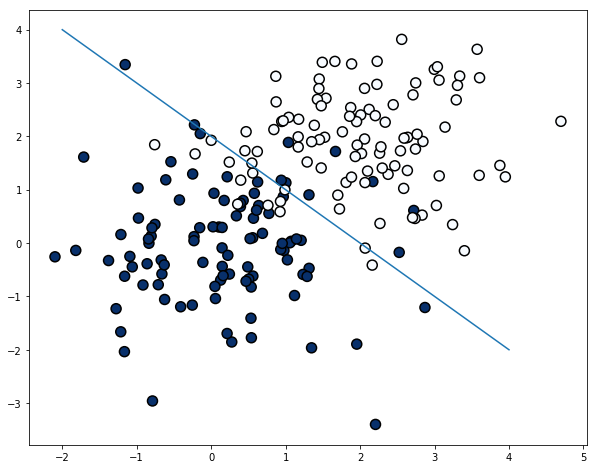

In [11]:
plt.figure(figsize=(10,8))
plt.scatter(train_data[:, 0], train_data[:, 1], c=train_labels, s=100, 
cmap='Blues_r', edgecolors='black', linewidth=1.5);
plt.plot(range(-2,5), range(4,-3,-1));

Separating the two classes above by training a decision tree with max_depth parameter to limit the depth of the tree.

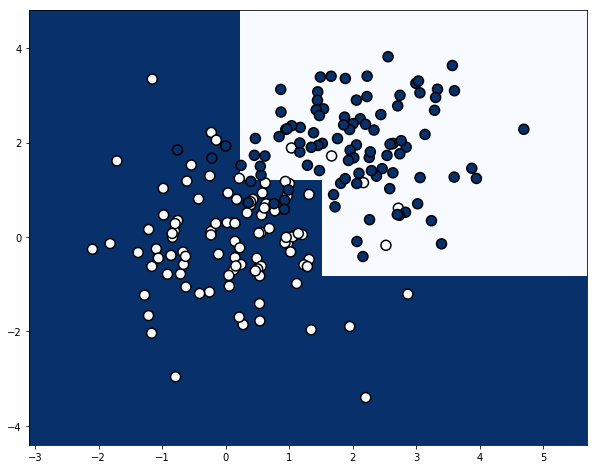

In [54]:
from sklearn.tree import DecisionTreeClassifier

# Let’s write an auxiliary function that will return grid for further visualization.
def get_grid(data):
    x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
    y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1
    return np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
clf_tree = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=17)

# training the tree
clf_tree.fit(train_data, train_labels)

# some code to depict separating surface
xx, yy = get_grid(train_data)
predicted = clf_tree.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
plt.figure(figsize=(10,8))
plt.pcolormesh(xx, yy, predicted, cmap='Blues_r')
plt.scatter(train_data[:, 0], train_data[:, 1], c=train_labels, s=100, 
cmap='Blues', edgecolors='black', linewidth=1.5);

In [57]:
# use .dot format to visualize a tree
from ipywidgets import Image
from io import StringIO
import pydotplus
from sklearn.tree import export_graphviz

dot_data = StringIO()
export_graphviz(clf_tree, feature_names=['x1', 'x2'],
                out_file=dot_data, filled=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(value=graph.create_png())

Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x04\xd0\x00\x00\x01\xf1\x08\x06\x00\x00\x00\xac\xfaA…

Remember Shannon's Entropy? Yup.

In [59]:
# wihout max_depth
clf_tree = DecisionTreeClassifier(criterion='entropy', random_state=17)

# training the tree
clf_tree.fit(train_data, train_labels)

dot_data = StringIO()
export_graphviz(clf_tree, feature_names=['x1', 'x2'],
                out_file=dot_data, filled=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(value=graph.create_png())

Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x04\xd0\x00\x00\x06\xd1\x08\x06\x00\x00\x00n\xf1zi\x…

Decision Tree on numerical features

In [60]:
data = pd.DataFrame({'Age':  [17,64,18,20,38,49,55,25,29,31,33], 
                      'Salary': [25,80,22,36,37,59,74,70,33,102,88], 
             'Loan Default': [1,0,1,0,1,0,0,1,1,0,1]})
data

,Age,Salary,Loan Default
0,17,25,1
1,64,80,0
2,18,22,1
3,20,36,0
4,38,37,1
5,49,59,0
6,55,74,0
7,25,70,1
8,29,33,1
9,31,102,0


In [62]:
data.sort_values('Age')

,Age,Salary,Loan Default
0,17,25,1
2,18,22,1
3,20,36,0
7,25,70,1
8,29,33,1
9,31,102,0
10,33,88,1
4,38,37,1
5,49,59,0
6,55,74,0


In [65]:
# fitting decision tree classifier
age_sal_tree = DecisionTreeClassifier(random_state=17)
age_sal_tree.fit(data[['Age', 'Salary']].values, data['Loan Default'].values);

In [68]:
# plotting the decision tree
dot_data = StringIO()
export_graphviz(age_sal_tree, feature_names=['Age', 'Salary'], out_file=dot_data, filled=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(value=graph.create_png())

Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x01\xf5\x00\x00\x02|\x08\x06\x00\x00\x00\xe7\x1f8\x9…